In [315]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

(16, 16, 1)


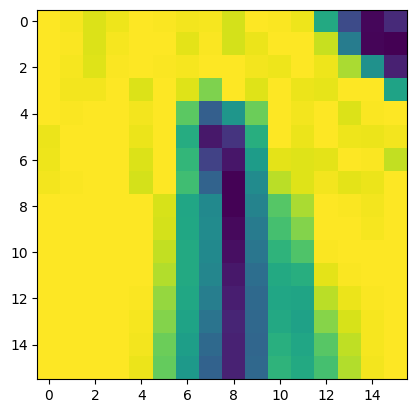

In [316]:
image = cv2.imread("Pattern.jpg")
cropped = image[0:16,124:(124+16),1:2]
print(cropped.shape)
plt.imshow(cropped)

In [317]:
# cv2.imshow('Image', cropped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[ 89  90  91  92  93  96  99 100 103 104 105 106 109 114 122 127 139 141
 142 144 145 146 149 153 154 158 159 160 163 165 168 169 173 176 179 181
 182 184 185 186 187 188 189 190 192 193 194 197 199 204 206 209 211 212
 213 216 218 223 224 225 229 234 236 238 239 240 241 244 245 246 247 248
 249 250 251 252 253 254 255]
[ 1  2  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  1  1  2  2  1  1
  1  1  1  1  1  1  2  2  1  1  1  1  1  1  2  1  3  2  1  5  1  2  1  2
  1  1  2  1  1  1  1  1  2  1  2  1  1  2  2  2  1  2  1  4  2  5  5  5
  1  9  6 12  9 15 92]


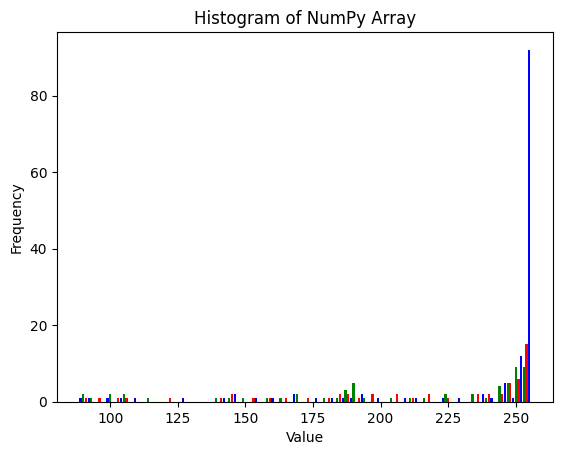

In [318]:
fig, ax = plt.subplots()
uniques,counts = np.unique(cropped.flatten(),return_counts = True)
print(uniques)
print(counts)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color = colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')
plt.show()

In [319]:
print("max - ",np.max(cropped))
print("min - ",np.min(cropped))
print("original range",np.max(cropped)-np.min(cropped))#range >> round this up to the nearest multiple of 8
range = np.max(cropped)-np.min(cropped)
print("range/7 - ",range/7)
print("range length - ",math.ceil(range/7))
print("updated range - ",math.ceil(range/7)*7)

max -  255
min -  89
original range 166
range/7 -  23.714285714285715
range length -  24
updated range -  168


In [320]:
def quantinze(number):
    image = cv2.imread("Pattern.jpg")
    image = image[0:16,124:(124+16),1:2]
    #quantice a number
    number_of_ranges = 7
    max_ = np.max(image)
    min_ = np.min(image)
    range_ = max_ - min_
    range_length = math.ceil(range_/number_of_ranges)
    updated_range = range_length*number_of_ranges
    value_to_add_for_range = updated_range - range_
    if (max_+ number_of_ranges) <= 255:
        max_ = max_ + value_to_add_for_range
    else:
        min_ = min_ - value_to_add_for_range
    quantized = None
    #find in which range the number is in
    #assign the quantized value 
    middle = min_ + (math.ceil((number-min_)/range_length)-1)*range_length + range_length/2 #middle value of the range it belongs
    if number < middle:
        quantized = min_ + (math.ceil((number-min_)/range_length)-1)*range_length
    else:
        quantized = min_ + (math.ceil((number-min_)/range_length))*range_length
    print("min - ",min_)
    print("max - ",max_)
    print(quantized)
    return quantized



In [321]:
quantinze(149)

min -  87
max -  255
159


159

In [322]:
new_arr = cropped.flatten()
new_arr = np.vectorize(lambda x: quantinze(x))(new_arr)

min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
183
min -  87
max -  255
135
min -  87
max -  255
87
min -  87
max -  255
111
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
231
min -  87
max -  255
159
min -  87
max -  255
87
min -  87
max -  255
87
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min -  87
max -  255
255
min

In [323]:
new_arr = np.reshape(new_arr,(16,16,1))
print(np.unique(new_arr))
# print(new_arr)

[ 87 111 135 159 183 207 231 255]


In [324]:
new_arr = np.reshape(new_arr,(16,16,1))
uniques,counts = np.unique(new_arr,return_counts = True)
print(uniques)
print(counts)

[ 87 111 135 159 183 207 231 255]
[  7  11   9  12  24  13  15 165]


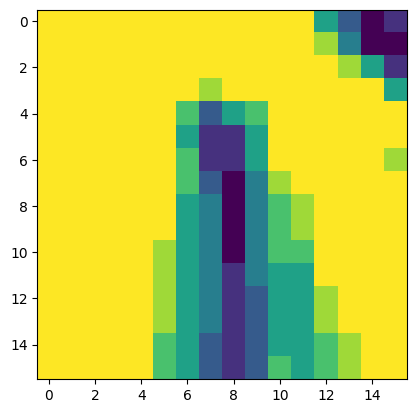

In [325]:
plt.imshow(new_arr)

[ 87 111 135 159 183 207 231 255]
[  7  11   9  12  24  13  15 165]


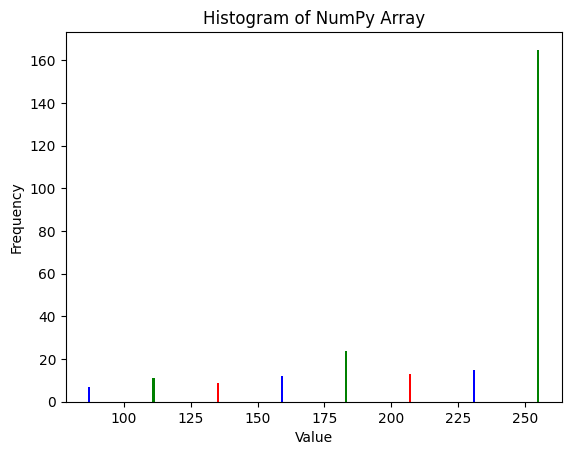

In [326]:
fig, ax = plt.subplots()
uniques,counts = np.unique(new_arr.flatten(),return_counts = True)
print(uniques)
print(counts)
colors = ['blue', 'green', 'red'] 
plt.bar(uniques,counts,color=colors)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')
plt.show()

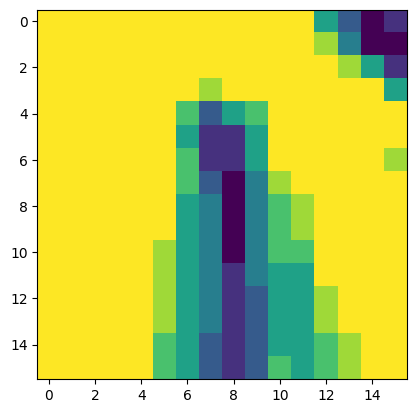

In [327]:
plt.imshow(new_arr)

Calculate probabilities

In [328]:
new_arr = np.reshape(new_arr,(16,16,1))
uniques,counts = np.unique(new_arr,return_counts = True)
probabilities = counts/np.sum(counts)
print(uniques)
print(counts)
print(probabilities)
print(np.sum(probabilities))

[ 87 111 135 159 183 207 231 255]
[  7  11   9  12  24  13  15 165]
[0.02734375 0.04296875 0.03515625 0.046875   0.09375    0.05078125
 0.05859375 0.64453125]
1.0
